## Observations and Insights 

In [ ]:
Observations
the male to female ratio was just about the same in the bar chart.
the younger aged mouse had more tumor volumes in many cases versus the older mouse.
the capamulin drug regimen had a low tumor volume compared to the other drug regimens but had a high timepoint

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
results_df = pd.merge (mouse_metadata, study_results, how = 'outer')

# Display the data table for preview
results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
results_df['Mouse ID'].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
results_df.loc[
    results_df.duplicated(subset=['Mouse ID','Timepoint'], keep='first'),
    "Mouse ID"
].unique() 

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
results_df = results_df[results_df['Mouse ID'] != "g989"]

results_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [7]:
# Checking the number of mice in the clean DataFrame.
len(results_df["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tv_mean = results_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tv_median = results_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tv_variance = results_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tv_std = results_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tv_sem = results_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
print (tv_mean, tv_median,tv_variance, tv_std, tv_sem)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_regimen = pd.DataFrame ({"Mean Tumor Volume": tv_mean,
                             "Median Tumor Volume": tv_median,
                             "Variance Tumor Volume": tv_variance, 
                             "Standard Deviation Tumor Volume": tv_std,
                             "SEM Tumor Volume": tv_sem})
drug_regimen

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64 Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Pro

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
results_df.groupby("Drug Regimen").agg(["mean","min","max","std", "sem"])["Tumor Volume (mm3)"]

/var/folders/pz/xncn4q6d7kl4vvbfqnjbt_s40000gn/T/ipykernel_1337/1671564346.py:4: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  results_df.groupby("Drug Regimen").agg(["mean","min","max","std", "sem"])["Tumor Volume (mm3)"]


,mean,min,max,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,23.343598,48.158209,4.994774,0.329346
Ceftamin,52.591172,45.000000,68.923185,6.268188,0.469821
Infubinol,52.884795,36.321346,72.226731,6.567243,0.492236
Ketapril,55.235638,45.000000,78.567014,8.279709,0.603860
Naftisol,54.331565,45.000000,76.668817,8.134708,0.596466
Placebo,54.033581,45.000000,73.212939,7.821003,0.581331
Propriva,52.320930,45.000000,72.455421,6.622085,0.544332
Ramicane,40.216745,22.050126,47.622816,4.846308,0.320955
Stelasyn,54.233149,45.000000,75.123690,7.710419,0.573111


## Bar and Pie Charts

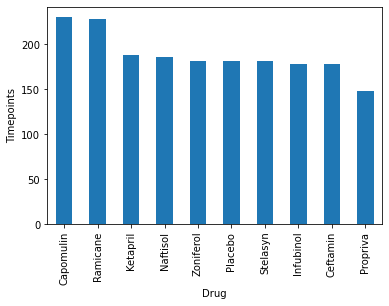

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#df= results_df.groupby ("Drug Regimen")["Timepoint"].count().to_frame()
#plt.bar(df.index, df["Timepoint"], color="b", align="center")
timepointcount = results_df["Drug Regimen"].value_counts()
timepointcount.plot(kind="bar")
plt.xticks(rotation =90)
plt.xlabel("Drug")
plt.ylabel("Timepoints")
plt.show()

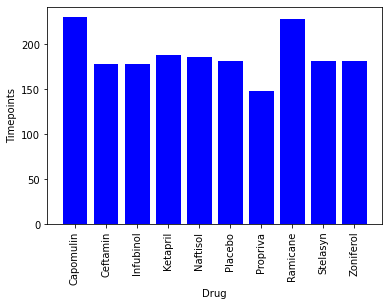

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


df= results_df.groupby ("Drug Regimen")["Timepoint"].count().to_frame()
plt.bar(df.index, df["Timepoint"], color="b", align="center")
#timepointcount = results_df["Drug Regimen"].value_counts()
#plt.bar(timepointcount.index.values,timepointcount.values)
plt.xticks(rotation =90)
plt.xlabel("Drug")
plt.ylabel("Timepoints")
plt.show()

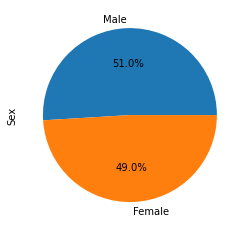

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


#results_df.groupby(["Sex"]).count()
#df= df.plot(kind="pie",y=(["count"]),title=('Mice gender '),autopct = '%1.1f%%', ylabel = (''))






#sex = ['Female', 'Male']
#colors=['Red', 'Blue']
#explode = (0.1,0,0,0,0,0,0,0,0,0)
#plt.pie (explode=explode, labels=sex, colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)
#plt.axis("equal")
#plt.show()


counts = results_df.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()


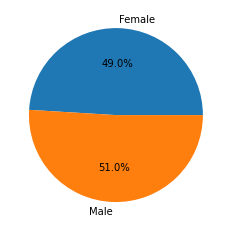

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

df = (results_df.groupby("Sex")["Sex"].count()/results_df.shape[0]).to_frame()
plt.pie(df["Sex"], labels= df.index,autopct='%1.1f%%');

## Quartiles, Outliers and Boxplots

In [14]:
maxtumor= results_df.groupby(['Mouse ID'])['Timepoint'].max()
maxtumor

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [15]:
maxtumor =maxtumor.reset_index()
maxtumor

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtumor= results_df.groupby(['Mouse ID'])['Timepoint'].max()
maxtumor =maxtumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergedf = maxtumor.merge(results_df,on=['Mouse ID', 'Timepoint'],how='left')
mergedf

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
druglist = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumorvollist = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in druglist:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finaltumorvolume=mergedf.loc[mergedf["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    
    # add subset 
    tumorvollist.append(finaltumorvolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = finaltumorvolume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=finaltumorvolume.loc[(finaltumorvolume < lower_bound)|(finaltumorvolume > upper_bound)]
    print(f"{drug}'s potential outliers are: {outliers}")

Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


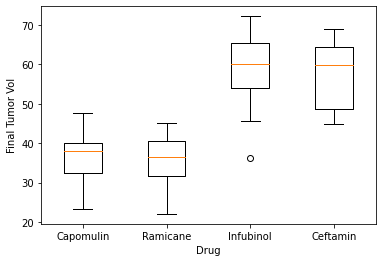

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumorvollist, labels = druglist)
plt.xlabel('Drug')
plt.ylabel('Final Tumor Vol')
plt.show()

## Line and Scatter Plots

10    45.000000
11    43.878496
12    37.614948
13    38.177232
14    36.866876
15    33.949940
16    32.959671
17    28.328531
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64


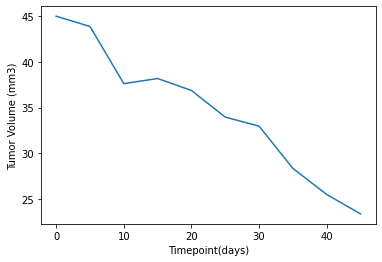

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = results_df.loc[results_df["Drug Regimen"] == 'Capomulin']
mousedata = mouse.loc[mouse["Mouse ID"] == 's185']
plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
print(mousedata['Tumor Volume (mm3)'])
plt.show() 

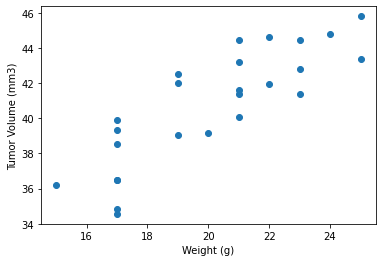

In [32]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
data = results_df.loc[results_df['Drug Regimen']=="Capomulin"]
view = data.groupby(['Mouse ID']).mean()
plt.scatter(view['Weight (g)'], view['Tumor Volume (mm3)']) 
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [ ]:
maxtumor_df.head()

## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
data = results_df.loc[results_df['Drug Regimen']=="Capomulin"]
view = data.groupby(['Mouse ID']).mean()
x_values = results_df['Weight (g)']
y_values = results_df['Tumor Volume (mm3)']
cor_coef = round( st.pearsonr(x_values, y_values)[0], 2)
print(cor_coef)


0.59


In [41]:
st.pearsonr(x_values, y_values)

(0.5881275121987515, 2.4476103457970203e-175)

In [40]:
print(f"The correlation coefficient between mouse weight and tumor volume is {cor_coef}")

The correlation coefficient between mouse weight and tumor volume is 0.59


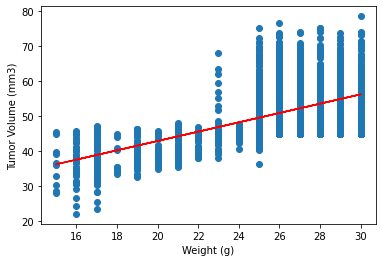

In [43]:
x_values = results_df['Weight (g)']
y_values = results_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## 